In [1]:
%tensorflow_version 1.x

import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets("data/MNIST/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X0 = data.train.images
Y0 = data.train.labels
X1 = data.validation.images
Y1 = data.validation.labels
print(X0.shape)

(55000, 784)


<Figure size 432x288 with 0 Axes>

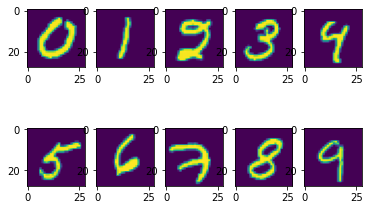

In [4]:
from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(2, 5)
ax = ax.flatten()

for i in range(10):
  Im = X0[Y0 == i][0].reshape(28, 28)
  ax[i].imshow(Im)
plt.show()

In [5]:
from keras.utils import to_categorical

YY0 = to_categorical(Y0)
YY1 = to_categorical(Y1)
YY1

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [6]:
from keras.layers import Activation, Dense, Flatten, Input
from keras import Model

input_shape=(784,)
input_layer = Input(input_shape)
x = input_layer
x = Dense(10)(x)
x = Activation('softmax')(x)
output_layer = x
model = Model(input_layer, output_layer)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
from keras.optimizers import Adam

model.compile(optimizer = Adam(0.01),
       loss = 'categorical_crossentropy',
       metrics=['accuracy'])

In [9]:
model.fit(X0, YY0,
     validation_data=(X1, YY1),
     batch_size=1000,
     epochs=10)


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 1s 12us/step - loss: 0.5838 - accuracy: 0.8338 - val_loss: 0.3238 - val_accuracy: 0.9108
Epoch 2/10
55000/55000 [==============================] - 0s 7us/step - loss: 0.3205 - accuracy: 0.9109 - val_loss: 0.2860 - val_accuracy: 0.9210
Epoch 3/10
55000/55000 [==============================] - 0s 7us/step - loss: 0.2950 - accuracy: 0.9177 - val_loss: 0.2743 - val_accuracy: 0.9242
Epoch 4/10
55000/55000 [==============================] - 0s 7us/step - loss: 0.2814 - accuracy: 0.9219 - val_loss: 0.2678 - val_accuracy: 0.9262
Epoch 5/10
55000/55000 [==============================] - 0s 7us/step - loss: 0.2738 - accuracy: 0.9229 - val_loss: 0.2629 - val_accuracy: 0.9288
Epoch 6/10
55000/55000 [==============================] - 0s 7us/step - loss: 0.2674 - accuracy: 0.9251 - val_loss: 0.2609 - val_accuracy: 0.9274
Epoch 7/10
55000/55000 [==============================] - 0s 7us/step - l

In [10]:
model.layers

In [11]:
model.layers[1].get_weights()

[array([[ 0.04777078,  0.01792902,  0.06964026, ..., -0.01375081,
          0.079086  , -0.0797214 ],
        [-0.01474757, -0.04487262, -0.04562732, ...,  0.05992859,
          0.03549832, -0.0509888 ],
        [ 0.08071705,  0.02952274, -0.05405409, ..., -0.02238097,
          0.05400657, -0.08134547],
        ...,
        [-0.01479182, -0.004172  ,  0.01772283, ...,  0.00811769,
          0.03710017,  0.05187816],
        [-0.02688168,  0.00600565,  0.08348428, ..., -0.01366382,
          0.0452297 ,  0.01102836],
        [-0.02537546,  0.084099  ,  0.03551374, ...,  0.0403245 ,
          0.03760175,  0.02510998]], dtype=float32),
 array([-0.4120161 ,  0.640226  ,  0.03662646, -0.49359447,  0.17843853,
         1.281498  , -0.21483332,  0.82115215, -1.3164748 , -0.2869174 ],
       dtype=float32)]

In [12]:
model.layers[1].get_weights()[0].shape

(784, 10)